In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Utilities.SequentialLearning.EWC_Methods.EWC_Methods import EWC_Method
from Utilities.Interpretability.ModelAugmentation import AggregationLevel, AggregationMethod

In [10]:
data_file = "data/AggregatedData.csv"
df = pd.read_csv(data_file, index_col="Unnamed: 0")
display(df)

,Epoch,Ewc Method,Aggregation Level,Threshold Value,Loss Mean,Loss Err,Validation Loss Mean,Validation Loss Err
0,5,FISHER_MATRIX,CONV_FILTER,0.00,0.020434,0.000349,0.032168,0.000485
1,5,FISHER_MATRIX,CONV_FILTER,0.05,0.021213,0.000303,0.032203,0.000400
2,5,FISHER_MATRIX,CONV_FILTER,0.10,0.028076,0.000440,0.038005,0.000486
3,5,FISHER_MATRIX,CONV_FILTER,0.15,0.122313,0.011855,0.128552,0.011354
4,5,FISHER_MATRIX,CONV_FILTER,0.20,0.227329,0.024740,0.229459,0.023892
...,...,...,...,...,...,...,...,...
1570,25,WEIGHT_CHANGE,UNIT,0.80,2.473056,0.022640,2.470531,0.022371
1571,25,WEIGHT_CHANGE,UNIT,0.85,2.359884,0.005162,2.358961,0.005083
1572,25,WEIGHT_CHANGE,UNIT,0.90,2.323731,0.002258,2.323474,0.002224
1573,25,WEIGHT_CHANGE,UNIT,0.95,2.307104,0.000321,2.307075,0.000315


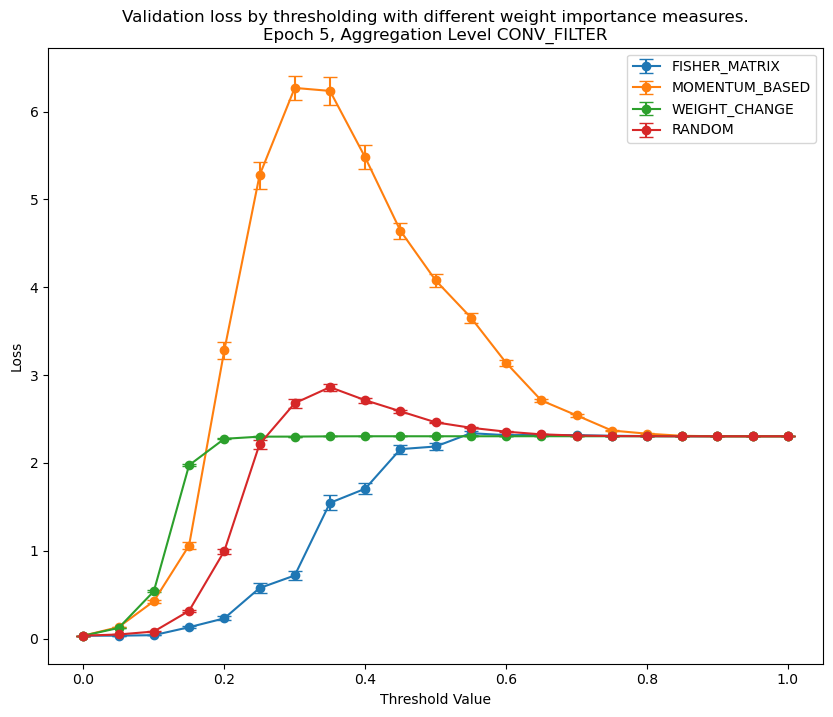

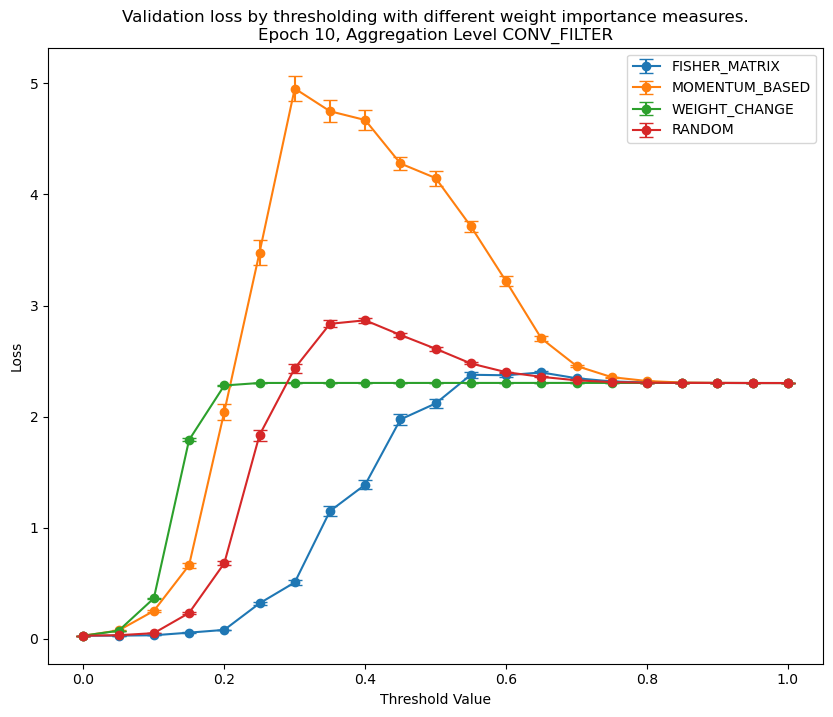

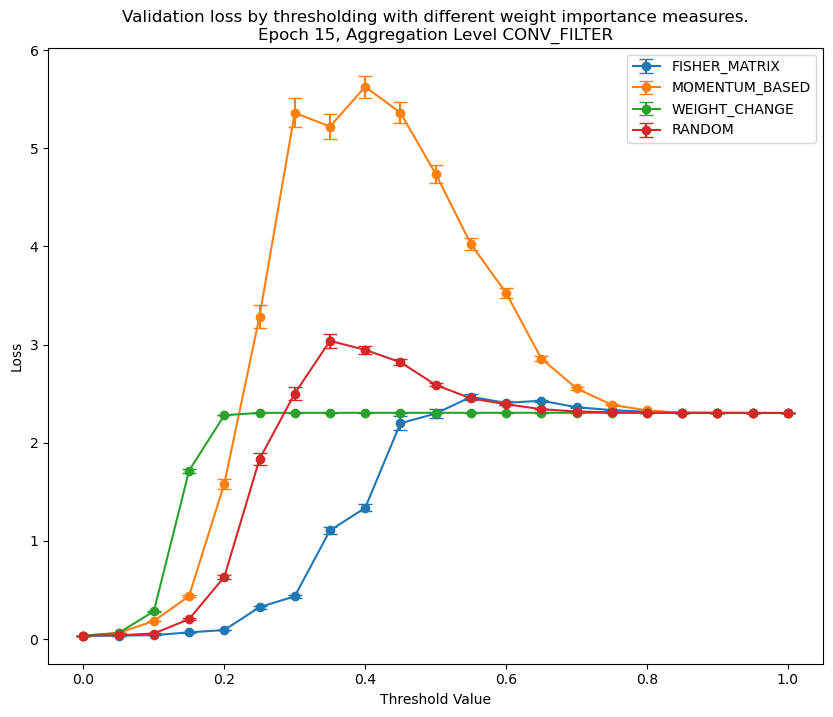

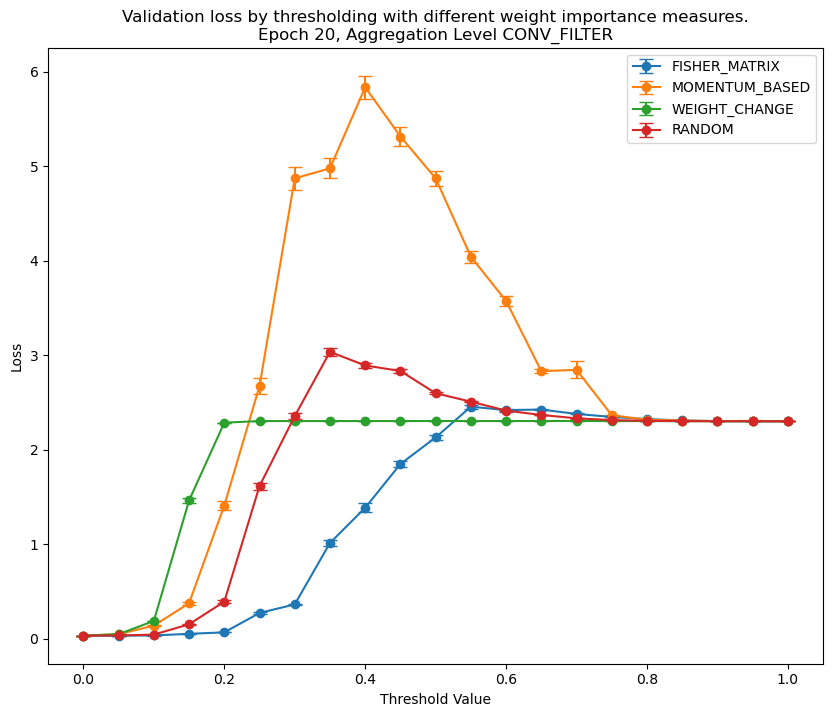

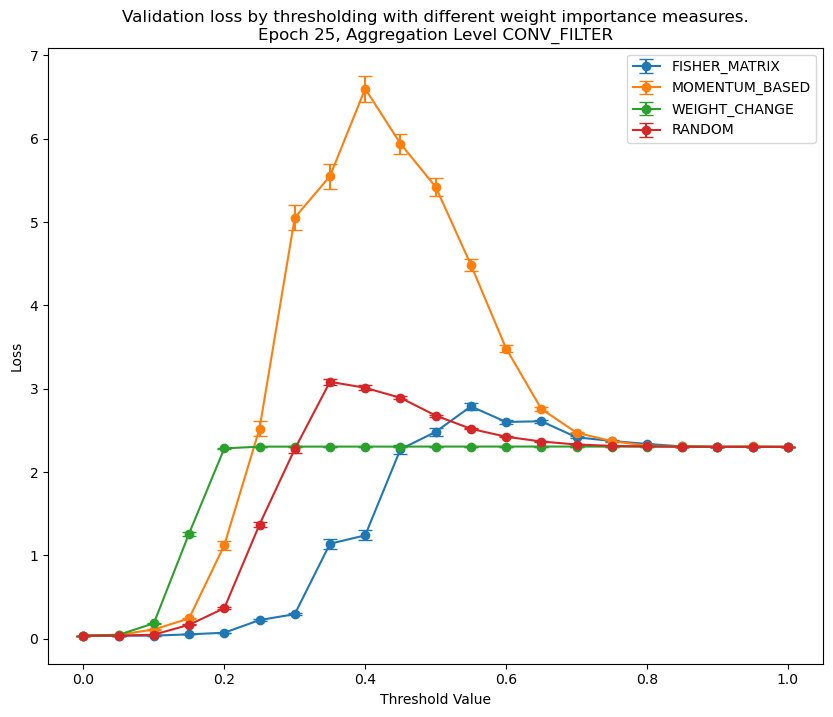

In [11]:
# Each plot is a snapshot of the model at a specific epoch - and all lines contain EWC methods with the same aggregation level

VALIDATION = True

target_methods = [
    EWC_Method.FISHER_MATRIX,
    # EWC_Method.SIGN_FLIPPING,
    EWC_Method.MOMENTUM_BASED,
    EWC_Method.WEIGHT_CHANGE,
    EWC_Method.RANDOM,
]
target_methods = [method.name for method in target_methods]
target_aggregation_level = AggregationLevel.CONV_FILTER.name

for epoch in df["Epoch"].unique():
    fig = plt.figure(figsize=(10,8))
    epoch_data = df.copy()
    epoch_data = epoch_data[epoch_data["Epoch"]==epoch]
    epoch_data = epoch_data[epoch_data["Aggregation Level"]==target_aggregation_level]
    for ewc_method in target_methods:
        curr_data = epoch_data[epoch_data["Ewc Method"]==ewc_method]
        y_col = "Validation Loss Mean" if VALIDATION else "Loss Mean"
        y_err_col = "Validation Loss Err" if VALIDATION else "Loss Err"
        plt.errorbar(curr_data["Threshold Value"], curr_data[y_col], curr_data[y_err_col], marker="o", capsize=5, label=f"{ewc_method}")
    plt.title(f"Validation loss by thresholding with different weight importance measures.\nEpoch {epoch}, Aggregation Level {target_aggregation_level}")
    # plt.ylim(0, 2*np.log(10))
    plt.xlabel("Threshold Value")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

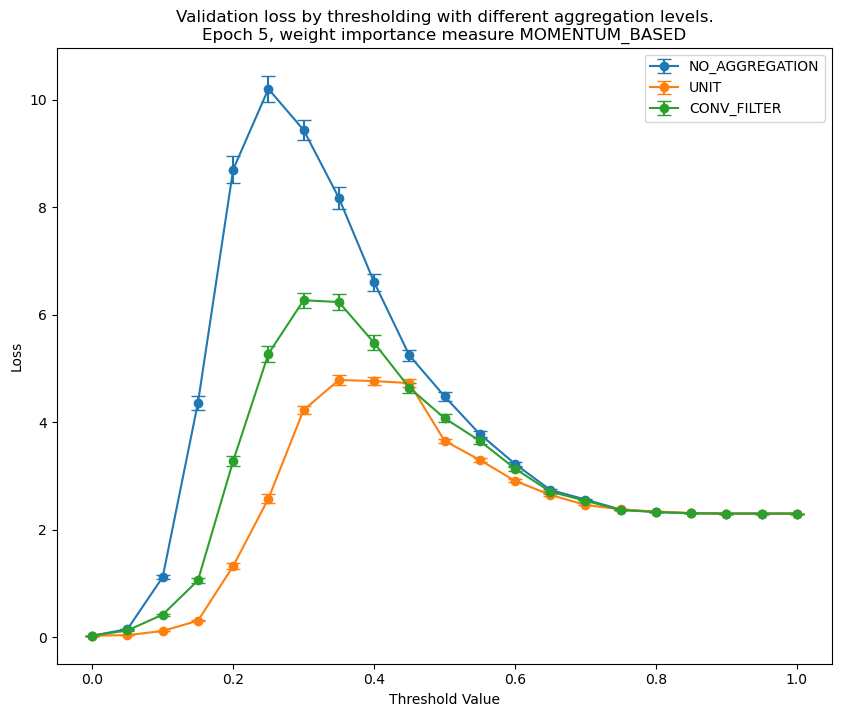

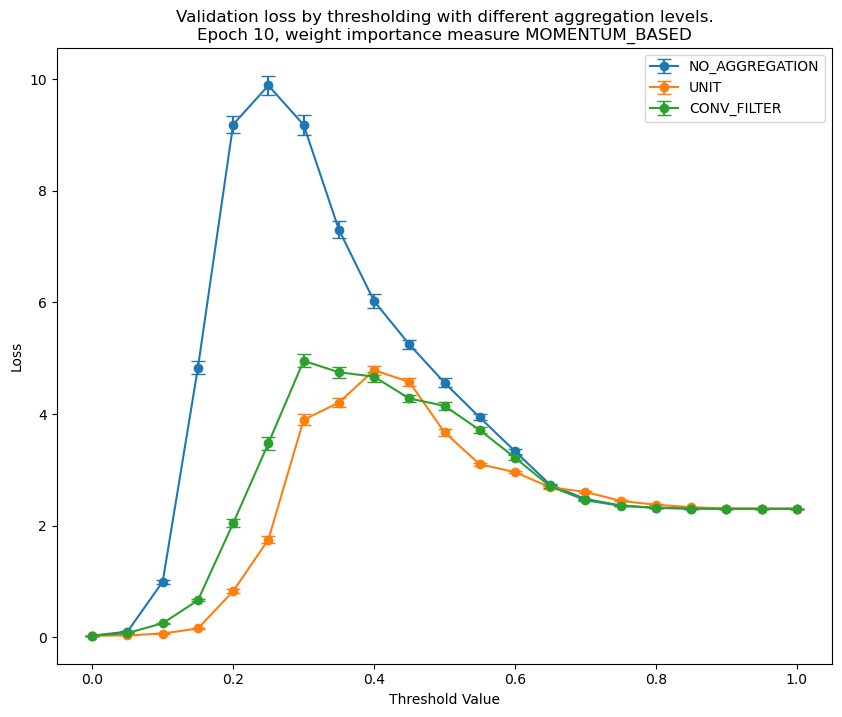

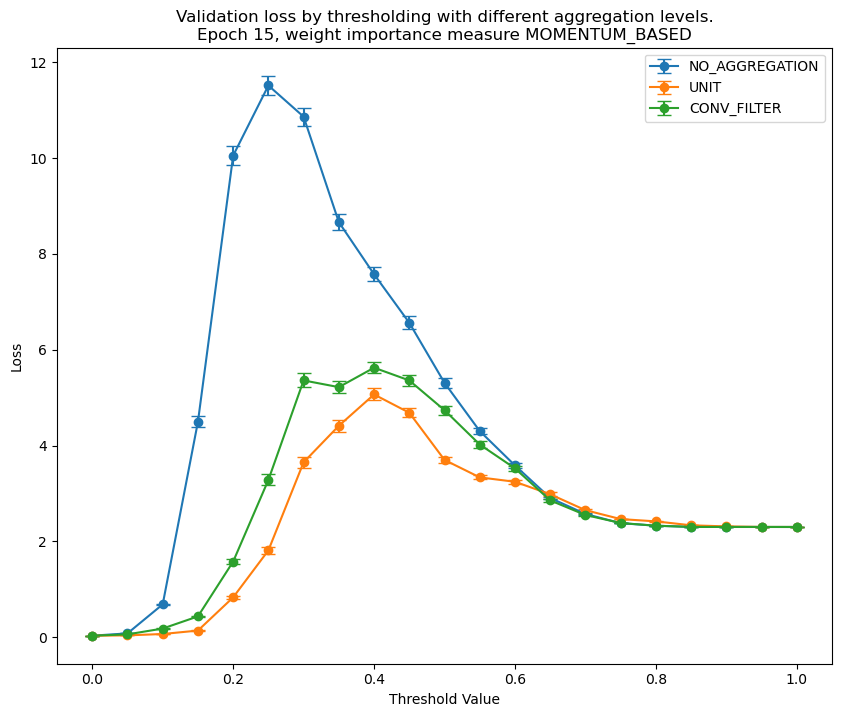

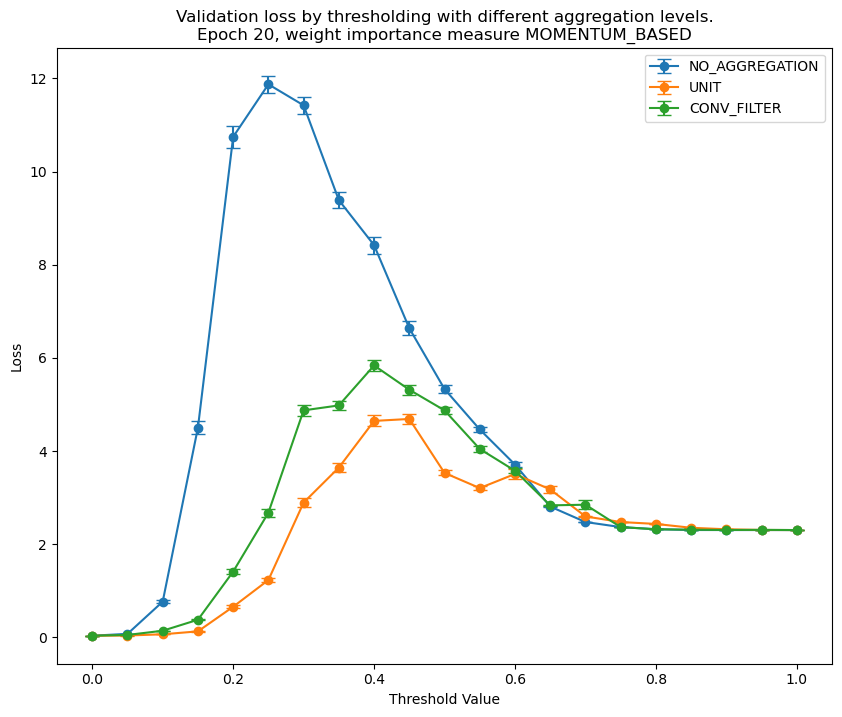

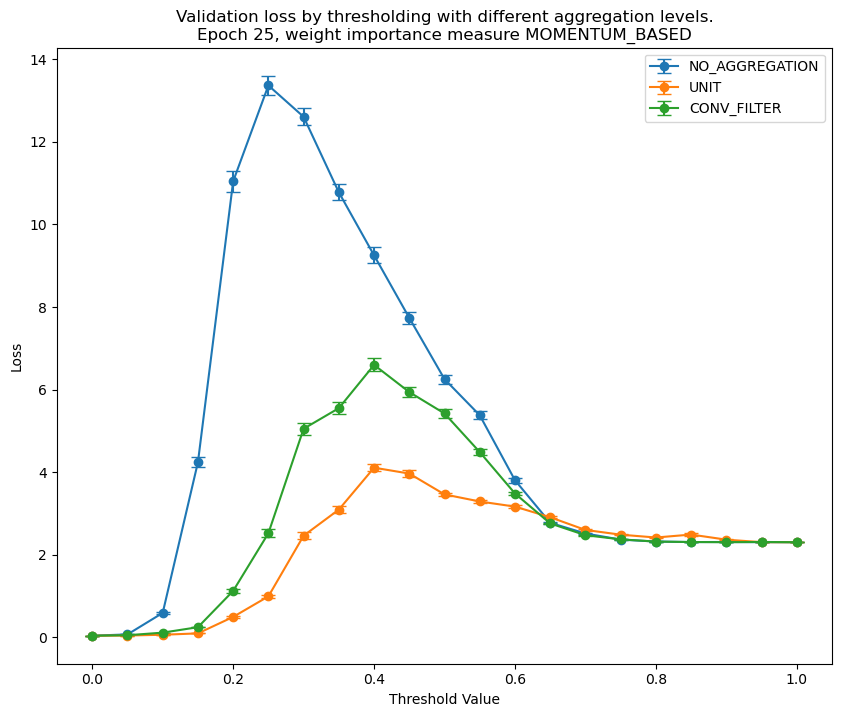

In [12]:
# Each plot is a snapshot of different aggregation levels - all lines are different aggregation levels with the same EWC method

VALIDATION = True

target_ewc_method = EWC_Method.MOMENTUM_BASED.name
target_aggregation_levels = [
    AggregationLevel.NO_AGGREGATION,
    AggregationLevel.UNIT,
    AggregationLevel.CONV_FILTER
]
target_aggregation_levels = [level.name for level in target_aggregation_levels]

for epoch in df["Epoch"].unique():
    fig = plt.figure(figsize=(10,8))
    epoch_data = df.copy()
    epoch_data = epoch_data[epoch_data["Epoch"]==epoch]
    epoch_data = epoch_data[epoch_data["Ewc Method"]==target_ewc_method]
    for aggregation_level in target_aggregation_levels:
        curr_data = epoch_data[epoch_data["Aggregation Level"]==aggregation_level]
        y_col = "Validation Loss Mean" if VALIDATION else "Loss Mean"
        y_err_col = "Validation Loss Err" if VALIDATION else "Loss Err"
        plt.errorbar(curr_data["Threshold Value"], curr_data[y_col], curr_data[y_err_col], marker="o", capsize=5, label=f"{aggregation_level}")
    plt.title(f"Validation loss by thresholding with different aggregation levels.\nEpoch {epoch}, weight importance measure {target_ewc_method}")
    plt.xlabel("Threshold Value")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()